In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from zipline.api import order_target, record, symbol
from zipline.algorithm import TradingAlgorithm

# 1. Data

In [6]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 3, 22)
data = web.DataReader("AAPL", "yahoo", start, end)

In [8]:
data = data[['Adj Close']]
data.columns = ['AAPL']
data = data.tz_localize('UTC')

# 2. Zipline

In [9]:
def initialize(context):
    context.i = 0
    context.sym = symbol('AAPL')

In [10]:
def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return

    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20:
        order_target(context.sym, 1)
    else:
        order_target(context.sym, -1)

    # 기록함으로써 결과로 출력됨
    record(AAPL=data.current(context.sym, "price"), ma5=ma5, ma20=ma20)

In [11]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  
C:\ProgramData\Anaconda3\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\ProgramData\Anaconda3\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


In [12]:
result.head()

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2009-12-31 21:00:00+00:00,NaN,NaN,0.0,NaN,-0.004135,NaN,NaN,0.0,100000.0,0.0,...,0.0,0.0,0,NaN,100000.0,0.0,0.0,1,[],0.0
2010-01-04 21:00:00+00:00,NaN,0.0,0.0,NaN,-0.008254,0.0,NaN,0.0,100000.0,0.0,...,0.0,0.0,0,NaN,100000.0,0.0,0.0,2,[],0.0
2010-01-05 21:00:00+00:00,NaN,0.0,0.0,NaN,-0.012355,0.0,NaN,0.0,100000.0,0.0,...,0.0,0.0,0,NaN,100000.0,0.0,0.0,3,[],0.0
2010-01-06 21:00:00+00:00,NaN,0.0,0.0,NaN,-0.016439,0.0,NaN,0.0,100000.0,0.0,...,0.0,0.0,0,NaN,100000.0,0.0,0.0,4,[],0.0
2010-01-07 21:00:00+00:00,NaN,0.0,0.0,NaN,-0.020507,0.0,NaN,0.0,100000.0,0.0,...,0.0,0.0,0,NaN,100000.0,0.0,0.0,5,[],0.0


In [13]:
result.columns

Index(['AAPL', 'algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'ma20', 'ma5', 'max_drawdown', 'max_leverage',
       'net_leverage', 'orders', 'period_close', 'period_label', 'period_open',
       'pnl', 'portfolio_value', 'positions', 'returns', 'sharpe',
       'short_exposure', 'short_value', 'shorts_count', 'sortino',
       'starting_cash', 'starting_exposure', 'starting_value', 'trading_days',
       'transactions', 'treasury_period_return'],
      dtype='object')

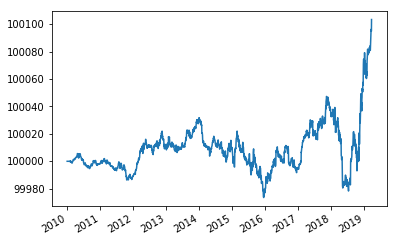

In [14]:
result['portfolio_value'].plot()

# 3. 전략 보완

In [16]:
def initialize(context):
    context.i = 0
    context.sym = symbol('AAPL')
    
    # 보유 여부
    context.hold = False

In [18]:
def handle_data(context, data):
    context.i += 1
    if context.i < 20:
        return

    buy = False
    sell = False

    ma5 = data.history(context.sym, 'price', 5, '1d').mean()
    ma20 = data.history(context.sym, 'price', 20, '1d').mean()

    if ma5 > ma20 and context.hold == False:
        order_target(context.sym, 100)
        context.hold = True
        buy = True
    elif ma5 < ma20 and context.hold == True:
        order_target(context.sym, -100)
        context.hold = False
        sell = True

    record(AAPL=data.current(context.sym, "price"), ma5=ma5, ma20=ma20, buy=buy, sell=sell)

In [19]:
algo = TradingAlgorithm(initialize=initialize, handle_data=handle_data)
result = algo.run(data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  
C:\ProgramData\Anaconda3\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\ProgramData\Anaconda3\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


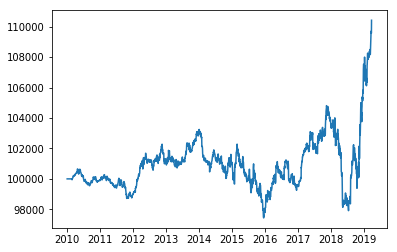

In [20]:
plt.plot(result.index, result.portfolio_value)
plt.show()

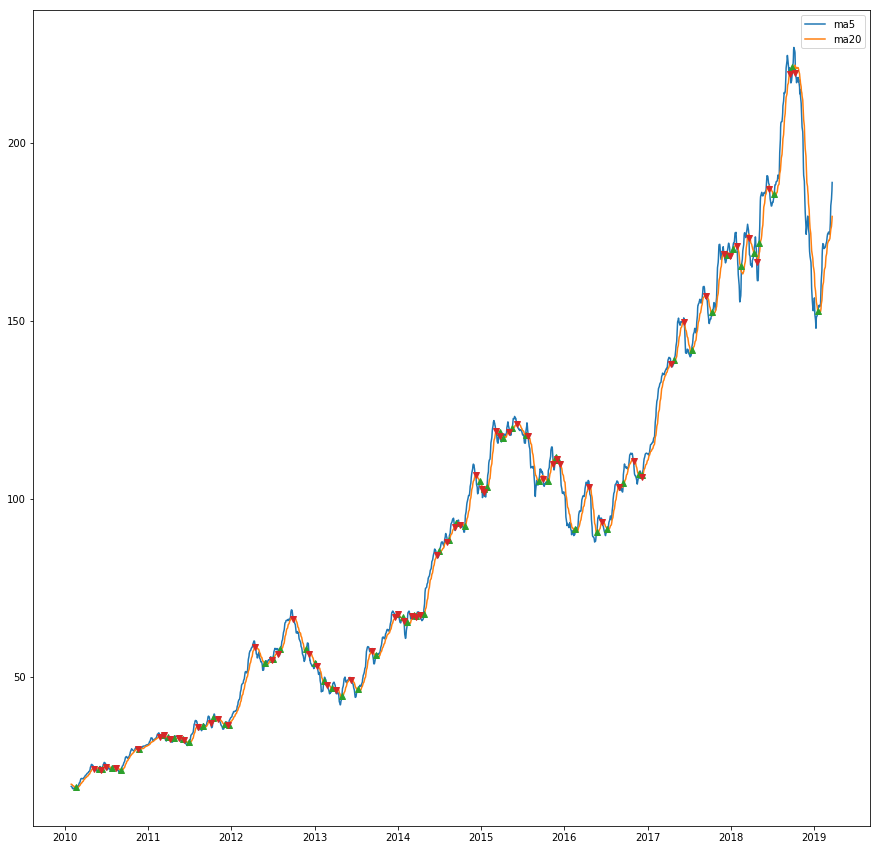

In [22]:
plt.figure(figsize=(15,15))

plt.plot(result.index, result.ma5)
plt.plot(result.index, result.ma20)
plt.legend(loc='best')

plt.plot(result.ix[result.buy == True].index, result.ma5[result.buy == True], '^')
plt.plot(result.ix[result.sell == True].index, result.ma5[result.sell == True], 'v')